# Missing Data

In [2]:
import pandas as pd

wine_file_name = "/content/drive/MyDrive/Data analytics course/winemag-data-130k-v2.csv"
wine_df = pd.read_csv(wine_file_name, index_col=0)
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Missing data represented by: "NaN", null, NA - all are equivavlent

In *pandas* NaN has its own datatype - *float64*.

In [4]:
import numpy as np

type(np.NaN)

float

There are several ways how to identify missing data - we observed them on previous lectures. For a sake of simplicity we will use just one option - visually see all cells (rows/columns) with "NaN" for column country and others.

In [5]:
wine_df[pd.isnull(wine_df.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [6]:
wine_df[pd.isnull(wine_df.region_2)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [7]:
wine_df.region_2.fillna("Unknown")
#wine_df.region_2 = wine_df.region_2.fillna("Unknown")

0                   Unknown
1                   Unknown
2         Willamette Valley
3                   Unknown
4         Willamette Valley
                ...        
129966              Unknown
129967         Oregon Other
129968              Unknown
129969              Unknown
129970              Unknown
Name: region_2, Length: 129971, dtype: object

Other methods for fixing missing data 

In [8]:
import numpy as np

students_data = {"Janis":[6.4, 7.4, np.nan, 6.9],
                 "Jelena":[7.5, np.nan, 7, 7.9],
                 "Daniels":[5.8, 6.4, 7.2, np.nan]
                 
}

students_data_df = pd.DataFrame(students_data)
students_data_df

,Janis,Jelena,Daniels
0,6.4,7.5,5.8
1,7.4,NaN,6.4
2,NaN,7.0,7.2
3,6.9,7.9,NaN


In [9]:
students_data_df_fna = students_data_df.fillna(0) 
students_data_df_fna

,Janis,Jelena,Daniels
0,6.4,7.5,5.8
1,7.4,0.0,6.4
2,0.0,7.0,7.2
3,6.9,7.9,0.0


In [10]:
#"Average":[6.57, 7.27, 7.07, 7.6]
students_data_df_fna["avg"] = students_data_df_fna.mean(axis=1)
students_data_df_fna

,Janis,Jelena,Daniels,avg
0,6.4,7.5,5.8,6.566667
1,7.4,0.0,6.4,4.600000
2,0.0,7.0,7.2,4.733333
3,6.9,7.9,0.0,4.933333


In [11]:
students_data_df.dropna()

,Janis,Jelena,Daniels
0,6.4,7.5,5.8


DropNa makes sense in small amount of total Missing data cases. But dropna in case all values in a row are missing - makes total sense.

In [12]:
students_data_df.dropna(how = 'all') #nomet ja visu rinda nav, šajā piemērā tā nav

,Janis,Jelena,Daniels
0,6.4,7.5,5.8
1,7.4,NaN,6.4
2,NaN,7.0,7.2
3,6.9,7.9,NaN


Much better methods

In [13]:
#Substitute missing value with previous one

students_data_df_fna_pad = students_data_df.fillna(method="pad")
students_data_df_fna_pad

,Janis,Jelena,Daniels
0,6.4,7.5,5.8
1,7.4,7.5,6.4
2,7.4,7.0,7.2
3,6.9,7.9,7.2


In [14]:
#"Average":[6.57, 7.27, 7.07, 7.6]
students_data_df_fna_pad['avg']=students_data_df_fna_pad.mean(axis=1)
students_data_df_fna_pad

,Janis,Jelena,Daniels,avg
0,6.4,7.5,5.8,6.566667
1,7.4,7.5,6.4,7.100000
2,7.4,7.0,7.2,7.200000
3,6.9,7.9,7.2,7.333333


In [15]:
#Substitute missing value with next one
students_data_df_fna_bfill = students_data_df.fillna(method="bfill") #backfill
students_data_df_fna_bfill

,Janis,Jelena,Daniels
0,6.4,7.5,5.8
1,7.4,7.0,6.4
2,6.9,7.0,7.2
3,6.9,7.9,NaN


In [16]:
#"Average":[6.57, 7.27, 7.07, 7.6]
students_data_df_fna_bfill['avg']=students_data_df_fna_bfill.mean(axis=1)
students_data_df_fna_bfill

,Janis,Jelena,Daniels,avg
0,6.4,7.5,5.8,6.566667
1,7.4,7.0,6.4,6.933333
2,6.9,7.0,7.2,7.033333
3,6.9,7.9,NaN,7.400000


In [17]:
students_data_df_fna_int = students_data_df.interpolate(method="linear", limit_direction="forward")
students_data_df_fna_int #aizpilda ņemot vērā iepriekšējo un nākamo vērtību

,Janis,Jelena,Daniels
0,6.40,7.50,5.8
1,7.40,7.25,6.4
2,7.15,7.00,7.2
3,6.90,7.90,7.2


In [18]:
#"Average":[6.57, 7.27, 7.07, 7.6]
students_data_df_fna_int['avg']=students_data_df_fna_int.mean(axis=1)
students_data_df_fna_int

,Janis,Jelena,Daniels,avg
0,6.40,7.50,5.8,6.566667
1,7.40,7.25,6.4,7.016667
2,7.15,7.00,7.2,7.116667
3,6.90,7.90,7.2,7.333333


**Q 05.1** - Which region is most common for wines' production (as per current dataset)?


Hint: Fix Missing data issue before you run analytics.

In [19]:
wine_reg_1_not_null = wine_df.loc[wine_df.region_1.notnull()].groupby("region_1")
wine_reg_1_not_null.size().sort_values(ascending=False)

region_1
Napa Valley                          4480
Columbia Valley (WA)                 4124
Russian River Valley                 3091
California                           2629
Paso Robles                          2350
                                     ... 
Mount Barker & Margaret River           1
Murray-Darling                          1
Muscat de Saint-Jean de Minervois       1
Canada                                  1
Massachusetts                           1
Length: 1229, dtype: int64

In [20]:
#2. variants
wine_df.region_1.fillna("Region_Missing").value_counts().sort_values(ascending=False)

Region_Missing          21247
Napa Valley              4480
Columbia Valley (WA)     4124
Russian River Valley     3091
California               2629
                        ...  
Loazzolo                    1
Frascati                    1
Burgundy                    1
Arribes del Duero           1
Tehama County               1
Name: region_1, Length: 1230, dtype: int64

**Q 05.2**- Import dataset with data about Pirkuma līgumi from 2019 year.


*   Do we have missing data?
*   If yes - how big % of data is missing?

In [21]:
file_name_ligumi = "/content/drive/MyDrive/Data analytics course/2019_gads.csv"
ligumi_df = pd.read_csv(file_name_ligumi, sep=';')
ligumi_df.head()


,ZGN,TERITORIJA,LĒMUMA_DATUMS,ĪPAŠUMA_VEIDS,SUMMA_EUR,PIRCEJS,PARDEVEJS,PAMATS
0,Daugavpils tiesa,Aglonas pag.,2019.01.10,Zemes nekustams īpašums,2660.0,1/1 (LR pilsonis),(pašvaldība),Pamats: 2018.gada 10.augusta pirkuma līgums.
1,Daugavpils tiesa,Aglonas pag.,2019.03.14,Zemes nekustams īpašums,2835.0,1/1 (LR reģistrēta uzņēmējsabiedrība),(LR reģistrēta uzņēmējsabiedrība),Pamats: 2019.gada 1.februāra pirkuma līgums Nr...
2,Daugavpils tiesa,Aglonas pag.,2019.03.25,Zemes un ēkas nekustams īpašums,36500.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 21.marta pirkuma līgums.
3,Daugavpils tiesa,Aglonas pag.,2019.04.03,Zemes un ēkas nekustams īpašums,3000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2018.gada 8.novembra pirkuma līgums Nr...
4,Daugavpils tiesa,Aglonas pag.,2019.05.08,Zemes un ēkas nekustams īpašums,7000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 24.aprīļa pirkuma līgums Nr....


In [22]:
ligumi_df.isnull().any()

ZGN              False
TERITORIJA       False
LĒMUMA_DATUMS    False
ĪPAŠUMA_VEIDS    False
SUMMA_EUR        False
PIRCEJS           True
PARDEVEJS         True
PAMATS           False
dtype: bool

In [23]:
ligumi_df.isnull().sum().sum()

830

In [24]:
ligumi_df.size

390576

In [25]:
ligumi_df.isnull().sum().sum()/ligumi_df.size*100

0.2125066568350334

In [26]:
import numpy as np
total_cells = np.product(ligumi_df.shape)
total_cells

390576

# Parsing Date

In [27]:
ligumi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48822 entries, 0 to 48821
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ZGN            48822 non-null  object 
 1   TERITORIJA     48822 non-null  object 
 2   LĒMUMA_DATUMS  48822 non-null  object 
 3   ĪPAŠUMA_VEIDS  48822 non-null  object 
 4   SUMMA_EUR      48822 non-null  float64
 5   PIRCEJS        48514 non-null  object 
 6   PARDEVEJS      48300 non-null  object 
 7   PAMATS         48822 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.0+ MB


*LĒMUMA_DATUMS* contains date recorded in a format: %Y.%m.%d

Some examples:

*   1/17/07 is in a format "%m/%d/%y"
*   17-1-2007 is in a format "%d-%m-%Y"
*   2019.03.25 is in a format "%Y.%m.%d"

In [28]:
ligumi_df["LĒMUMA_DATUMS_Parsed"] = pd.to_datetime(ligumi_df["LĒMUMA_DATUMS"], format="%Y.%m.%d")
ligumi_df.head()

,ZGN,TERITORIJA,LĒMUMA_DATUMS,ĪPAŠUMA_VEIDS,SUMMA_EUR,PIRCEJS,PARDEVEJS,PAMATS,LĒMUMA_DATUMS_Parsed
0,Daugavpils tiesa,Aglonas pag.,2019.01.10,Zemes nekustams īpašums,2660.0,1/1 (LR pilsonis),(pašvaldība),Pamats: 2018.gada 10.augusta pirkuma līgums.,2019-01-10
1,Daugavpils tiesa,Aglonas pag.,2019.03.14,Zemes nekustams īpašums,2835.0,1/1 (LR reģistrēta uzņēmējsabiedrība),(LR reģistrēta uzņēmējsabiedrība),Pamats: 2019.gada 1.februāra pirkuma līgums Nr...,2019-03-14
2,Daugavpils tiesa,Aglonas pag.,2019.03.25,Zemes un ēkas nekustams īpašums,36500.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 21.marta pirkuma līgums.,2019-03-25
3,Daugavpils tiesa,Aglonas pag.,2019.04.03,Zemes un ēkas nekustams īpašums,3000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2018.gada 8.novembra pirkuma līgums Nr...,2019-04-03
4,Daugavpils tiesa,Aglonas pag.,2019.05.08,Zemes un ēkas nekustams īpašums,7000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 24.aprīļa pirkuma līgums Nr....,2019-05-08


In [29]:
#Trying to guess data format automatically
ligumi_df["LĒMUMA_DATUMS_Parsed_2"] = pd.to_datetime(ligumi_df["LĒMUMA_DATUMS"], infer_datetime_format=True)
ligumi_df.head()

,ZGN,TERITORIJA,LĒMUMA_DATUMS,ĪPAŠUMA_VEIDS,SUMMA_EUR,PIRCEJS,PARDEVEJS,PAMATS,LĒMUMA_DATUMS_Parsed,LĒMUMA_DATUMS_Parsed_2
0,Daugavpils tiesa,Aglonas pag.,2019.01.10,Zemes nekustams īpašums,2660.0,1/1 (LR pilsonis),(pašvaldība),Pamats: 2018.gada 10.augusta pirkuma līgums.,2019-01-10,2019-01-10
1,Daugavpils tiesa,Aglonas pag.,2019.03.14,Zemes nekustams īpašums,2835.0,1/1 (LR reģistrēta uzņēmējsabiedrība),(LR reģistrēta uzņēmējsabiedrība),Pamats: 2019.gada 1.februāra pirkuma līgums Nr...,2019-03-14,2019-03-14
2,Daugavpils tiesa,Aglonas pag.,2019.03.25,Zemes un ēkas nekustams īpašums,36500.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 21.marta pirkuma līgums.,2019-03-25,2019-03-25
3,Daugavpils tiesa,Aglonas pag.,2019.04.03,Zemes un ēkas nekustams īpašums,3000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2018.gada 8.novembra pirkuma līgums Nr...,2019-04-03,2019-04-03
4,Daugavpils tiesa,Aglonas pag.,2019.05.08,Zemes un ēkas nekustams īpašums,7000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 24.aprīļa pirkuma līgums Nr....,2019-05-08,2019-05-08


In [30]:
ligumi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48822 entries, 0 to 48821
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ZGN                     48822 non-null  object        
 1   TERITORIJA              48822 non-null  object        
 2   LĒMUMA_DATUMS           48822 non-null  object        
 3   ĪPAŠUMA_VEIDS           48822 non-null  object        
 4   SUMMA_EUR               48822 non-null  float64       
 5   PIRCEJS                 48514 non-null  object        
 6   PARDEVEJS               48300 non-null  object        
 7   PAMATS                  48822 non-null  object        
 8   LĒMUMA_DATUMS_Parsed    48822 non-null  datetime64[ns]
 9   LĒMUMA_DATUMS_Parsed_2  48822 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 3.7+ MB


Why not to use *infer_datetime_format=True* all time?

1. Pandas can not guess specific date formats.
2. It asks for more time to process such transformations (thus performance issue may arrise).

**Continue with Date Parsing**

In [31]:
ligumi_df.head()

,ZGN,TERITORIJA,LĒMUMA_DATUMS,ĪPAŠUMA_VEIDS,SUMMA_EUR,PIRCEJS,PARDEVEJS,PAMATS,LĒMUMA_DATUMS_Parsed,LĒMUMA_DATUMS_Parsed_2
0,Daugavpils tiesa,Aglonas pag.,2019.01.10,Zemes nekustams īpašums,2660.0,1/1 (LR pilsonis),(pašvaldība),Pamats: 2018.gada 10.augusta pirkuma līgums.,2019-01-10,2019-01-10
1,Daugavpils tiesa,Aglonas pag.,2019.03.14,Zemes nekustams īpašums,2835.0,1/1 (LR reģistrēta uzņēmējsabiedrība),(LR reģistrēta uzņēmējsabiedrība),Pamats: 2019.gada 1.februāra pirkuma līgums Nr...,2019-03-14,2019-03-14
2,Daugavpils tiesa,Aglonas pag.,2019.03.25,Zemes un ēkas nekustams īpašums,36500.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 21.marta pirkuma līgums.,2019-03-25,2019-03-25
3,Daugavpils tiesa,Aglonas pag.,2019.04.03,Zemes un ēkas nekustams īpašums,3000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2018.gada 8.novembra pirkuma līgums Nr...,2019-04-03,2019-04-03
4,Daugavpils tiesa,Aglonas pag.,2019.05.08,Zemes un ēkas nekustams īpašums,7000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 24.aprīļa pirkuma līgums Nr....,2019-05-08,2019-05-08


In [32]:
ligumi_df["LĒMUMA_DATUMS_Parsed"].dt.day

0        10
1        14
2        25
3         3
4         8
         ..
48817     2
48818    18
48819    18
48820    29
48821    23
Name: LĒMUMA_DATUMS_Parsed, Length: 48822, dtype: int64

In [33]:
import numpy as np

ligumi_df_2019 = ligumi_df.loc[ligumi_df.LĒMUMA_DATUMS_Parsed.dt.year==2019]
ligumi_df_2019

,ZGN,TERITORIJA,LĒMUMA_DATUMS,ĪPAŠUMA_VEIDS,SUMMA_EUR,PIRCEJS,PARDEVEJS,PAMATS,LĒMUMA_DATUMS_Parsed,LĒMUMA_DATUMS_Parsed_2
0,Daugavpils tiesa,Aglonas pag.,2019.01.10,Zemes nekustams īpašums,2660.0,1/1 (LR pilsonis),(pašvaldība),Pamats: 2018.gada 10.augusta pirkuma līgums.,2019-01-10,2019-01-10
1,Daugavpils tiesa,Aglonas pag.,2019.03.14,Zemes nekustams īpašums,2835.0,1/1 (LR reģistrēta uzņēmējsabiedrība),(LR reģistrēta uzņēmējsabiedrība),Pamats: 2019.gada 1.februāra pirkuma līgums Nr...,2019-03-14,2019-03-14
2,Daugavpils tiesa,Aglonas pag.,2019.03.25,Zemes un ēkas nekustams īpašums,36500.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 21.marta pirkuma līgums.,2019-03-25,2019-03-25
3,Daugavpils tiesa,Aglonas pag.,2019.04.03,Zemes un ēkas nekustams īpašums,3000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2018.gada 8.novembra pirkuma līgums Nr...,2019-04-03,2019-04-03
4,Daugavpils tiesa,Aglonas pag.,2019.05.08,Zemes un ēkas nekustams īpašums,7000.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 24.aprīļa pirkuma līgums Nr....,2019-05-08,2019-05-08
...,...,...,...,...,...,...,...,...,...,...
48817,Zemgales rajona tiesa,Zentenes pag.,2019.09.02,Zemes un ēkas nekustams īpašums,60800.0,1/1 (LR pilsonis),(LR pilsonis),Pamats: 2019.gada 31.jūlija Nekustamā īpašuma ...,2019-09-02,2019-09-02
48818,Zemgales rajona tiesa,Zentenes pag.,2019.09.18,Zemes un ēkas nekustams īpašums,9854.1,1/1 (LR pilsonis),(pašvaldība),Pamats: 2017.gada 27.novembra Nekustamā īpašum...,2019-09-18,2019-09-18
48819,Zemgales rajona tiesa,Zentenes pag.,2019.10.18,Zemes nekustams īpašums,45000.0,1/1 (LR reģistrēta uzņēmējsabiedrība),(LR reģistrēta uzņēmējsabiedrība),"Pamats: 2019.gada 10.jūnija pirkuma līgums, gr...",2019-10-18,2019-10-18
48820,Zemgales rajona tiesa,Zentenes pag.,2019.11.29,Zemes un ēkas nekustams īpašums,18275.0,1/12 (LR pilsonis); 1/12 (LR pilsonis); 1/12 (...,(LR pilsonis),Pamats: 2019.gada 21.novembra Nekustamā īpašum...,2019-11-29,2019-11-29


In [34]:
ligumi_df_2019_groups = ligumi_df_2019.groupby(ligumi_df.LĒMUMA_DATUMS_Parsed.dt.month)
ligumi_df_2019_groups.SUMMA_EUR.agg([np.mean, np.min, np.max]) #agregācija kolonnai SUMMA_EUR

,mean,amin,amax
LĒMUMA_DATUMS_Parsed,,,
1,34215.501596,1.00,2626305.0
2,35526.295517,1.00,2400000.0
3,31092.907850,0.01,1688826.4
4,31948.239127,1.00,6150000.0
5,31957.962797,1.00,3600000.0
6,34425.551189,2.50,7484400.0
7,31893.219880,1.00,3550000.0
8,34720.331360,1.00,3000000.0
9,34560.520838,1.00,6300000.0


In [35]:
ligumi_df_2019.loc[ligumi_df_2019.SUMMA_EUR == 2626305.0] #vēlams izmantot loc filtrēšanai, iet katrai rindai cauri

,ZGN,TERITORIJA,LĒMUMA_DATUMS,ĪPAŠUMA_VEIDS,SUMMA_EUR,PIRCEJS,PARDEVEJS,PAMATS,LĒMUMA_DATUMS_Parsed,LĒMUMA_DATUMS_Parsed_2
13349,Rīgas pilsētas Vidzemes priekšpilsētas tiesa,Rīga,2019.01.14,"Neapdzīvojamās telpas (garāža,veikals,darbnīca)",2626305.0,1/1 (LR reģistrēta uzņēmējsabiedrība),(LR reģistrēta uzņēmējsabiedrība),Pamats: 2018.gada 27.decembra pirkuma līgums.,2019-01-14,2019-01-14




---



**Q 05.02** - Analyze dataset based on *ĪPAŠUMA_VEIDS*:



*   Name unique *ĪPAŠUMA_VEIDS*
*   Show basic statistics for different *ĪPAŠUMA_VEIDS*: mean, max, min
*   Name Top3 cities, where *ĪPAŠUMA_VEIDS* has higher price tag



In [36]:
#Name unique ĪPAŠUMA_VEIDS
ligumi_df["ĪPAŠUMA_VEIDS"].unique().tolist()

['Zemes nekustams īpašums',
 'Zemes un ēkas nekustams īpašums',
 'Dzīvokļa īpašums ',
 'Patstāvīgs ēkas nekustams īpašums',
 'Neapdzīvojamās telpas (garāža,veikals,darbnīca)',
 'Privatizējamā objekta sākotnējā reģistrācija']

In [37]:
#Show basic statistics for different ĪPAŠUMA_VEIDS: mean, max, min
ligumi_df_ipasuma_veids_groups = ligumi_df.groupby("ĪPAŠUMA_VEIDS")
ligumi_df_ipasuma_veids_groups.SUMMA_EUR.agg([np.mean, np.min, np.max]).sort_values(by="mean", ascending=False) #agregācija kolonnai SUMMA_EUR

,mean,amin,amax
ĪPAŠUMA_VEIDS,,,
Zemes un ēkas nekustams īpašums,60394.887496,1.00,23500000.00
Dzīvokļa īpašums,35901.598965,1.00,1178197.32
Zemes nekustams īpašums,24105.925680,0.01,24434513.00
Patstāvīgs ēkas nekustams īpašums,18457.215435,100.00,2750000.00
"Neapdzīvojamās telpas (garāža,veikals,darbnīca)",14249.054651,1.00,2626305.00
Privatizējamā objekta sākotnējā reģistrācija,4588.800000,200.00,7000.00


In [53]:
#Name Top3 cities, where ĪPAŠUMA_VEIDS has higher price tag
ligumi_df_ipasuma_veids_cities_groups = ligumi_df.groupby(["ĪPAŠUMA_VEIDS","TERITORIJA"]).SUMMA_EUR.max().sort_values(ascending=False)
ligumi_df_ipasuma_veids_cities_groups

ĪPAŠUMA_VEIDS                                    TERITORIJA   
Zemes nekustams īpašums                          Rīga             24434513.00
Zemes un ēkas nekustams īpašums                  Rīga             23500000.00
                                                 Cenu pag.         6300000.00
Zemes nekustams īpašums                          Mārupes nov.      5073215.27
                                                 Sējas nov.        3585600.00
                                                                     ...     
Dzīvokļa īpašums                                 Sēlpils pag.          150.00
Neapdzīvojamās telpas (garāža,veikals,darbnīca)  Bārtas pag.           121.00
Dzīvokļa īpašums                                 Dubnas pag.           100.00
Neapdzīvojamās telpas (garāža,veikals,darbnīca)  Auce                   10.00
Dzīvokļa īpašums                                 Kaplavas pag.           1.00
Name: SUMMA_EUR, Length: 1762, dtype: float64

In [50]:
# 2.variants
ligumi_df_teritorija = ligumi_df.groupby("TERITORIJA")
ligumi_df_teritorija.SUMMA_EUR.max().sort_values(ascending=False)

TERITORIJA
Rīga            24434513.00
Cenu pag.        6300000.00
Mārupes nov.     5073215.27
Sējas nov.       3585600.00
Ādažu nov.       3000000.00
                   ...     
Ilūkste             5500.00
Kārsava             5300.00
Ilzenes pag.        5000.00
Seda                4000.00
Viļaka              3800.00
Name: SUMMA_EUR, Length: 584, dtype: float64



---



**Check your date parsing**


Sometimes you can miss-type day with month. Visualization can be an option as well.

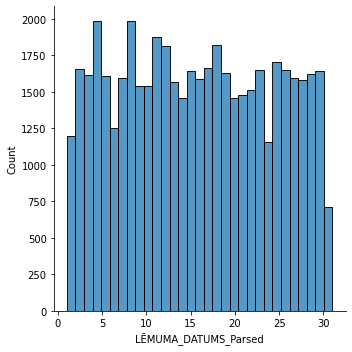

In [39]:
ligumi_df_days = ligumi_df["LĒMUMA_DATUMS_Parsed"].dt.day
# ligumi_df_days

import seaborn as sns

sns.displot(ligumi_df_days, kde=False, bins=31)

# String Conversions

In [40]:
str = "Man patīk analītika!"
str

'Man patīk analītika!'

For efficient storage of these strings, the sequence of code points is converted into a set of *bytes*. The process is known as **encoding**.

In [41]:
str_enc = str.encode(encoding="utf8", errors="replace")
type(str_enc)

bytes

In [42]:
#We can convert sequence of byte-s back to UTF-8
type(str_enc.decode(encoding="utf8"))

str

Sometimes you can run into problems, if coding format (e.g. UTF-8, ASCII) are not set properly. 

Look at example below:

In [43]:
str = "Man patīk analītika!"
str_enc = str.encode(encoding="ascii", errors="replace")
str_enc.decode(encoding="ascii")

'Man pat?k anal?tika!'

Image - what would happen if your **dataset** would contain **encoding format issues**?! It may ruin your analytics or make results irrelevant if not possible.

In [44]:
ks_2016_file = "/content/drive/MyDrive/Data analytics course/ks-projects-201612.csv"
df_ks_2016 = pd.read_csv(ks_2016_file)
# te būs errors

UnicodeDecodeError: ignored

So, data-set is not in UTF-8, since by default Python and Pandas expect text to be in that format, but we have error. What do we have to find right encoding:

1. Read and follow data-set documaentation
2. Try to guess the encoding
3. Use chardet and let Python to guess right encoding - not perfectly fine solution (doesn't guarantee 100% ability to guess), however better than just guessing on your own. :)

In [45]:
import chardet

with open(ks_2016_file, 'rb') as rawdata:
  result = chardet.detect(rawdata.read())

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7299490257296292, 'language': ''}


Since we know that problem occurs at 11th character, we can reduce chardet required amount of characters to analyze.

In [46]:
import chardet

with open(ks_2016_file, 'rb') as rawdata:
  result = chardet.detect(rawdata.read(10000))


print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


Now we know that encoding of ks_2016 data-set is 'Windows-1252', thus we can tell it to Pandas.

In [47]:
ks_2016_file = "/content/drive/MyDrive/Data analytics course/ks-projects-201612.csv"
df_ks_2016 = pd.read_csv(ks_2016_file, encoding="Windows-1252")
df_ks_2016.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Now, when you have detected encoding right - it is a good choice to save orginal data-set as file encoded with UTF-8.

In [48]:
df_ks_2016.to_csv("ks-projects_2016-utf-8") #konvertē uz utf8

# Fixing Data Entries

In [54]:
df_ks_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

In [57]:
df_ks_2016.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [58]:
df_ks_2016["main_category "].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Metal', 'Cookbooks', 'Web',
       'Shorts', 'Plays', 'Hardware', 'Playing Cards', 'World Music',
       'Mobile Games', 'Camera Equipment', 'Classical Music',
       'Conceptual Art', 'Nonfiction', 'Product Design', 'Documentary',
       'Video Games', ' 50 Years in the Making', 'Country & Folk',
       'Mixed Media', 'Comic Books', ' Retro Gaming art.', 'Places',
       'Events', 'Fiction', 'Tabletop Games', 'Video', 'Performance Art',
       'Small Batch', "Children's Books", 'Poetry', 'Public Art',
       'Art Books', 'Drama', 'Apparel', 'Sculpture', 'DIY', 'Hip-Hop',
       'Accessories', 'People', 'Webseries', 'Interactive Design',
       'Periodicals', 'Vegan', 'Indie Rock', 'Academic', 'Pop',
       ' M.ercury E.dition)', 'Faith', 'Jazz', 'Space Exploration',
       'Performances', 'Digital A

We see several *Main categories* shown with *spaces* in beginning as well *Film & Video* seems very close to just *Video* category. Moreover we see some categories are starting with lower cases. 

Suggest we fix all three issues.

Let's start with removing unnecessary *spaces*.

In [59]:
#strip() removes spaces at the beginning and at the end of the string
df_ks_2016["main_category "] = df_ks_2016["main_category "].str.strip() #pārveido ar str object tipu uz string
df_ks_2016["main_category "].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Metal', 'Cookbooks', 'Web',
       'Shorts', 'Plays', 'Hardware', 'Playing Cards', 'World Music',
       'Mobile Games', 'Camera Equipment', 'Classical Music',
       'Conceptual Art', 'Nonfiction', 'Product Design', 'Documentary',
       'Video Games', '50 Years in the Making', 'Country & Folk',
       'Mixed Media', 'Comic Books', 'Retro Gaming art.', 'Places',
       'Events', 'Fiction', 'Tabletop Games', 'Video', 'Performance Art',
       'Small Batch', "Children's Books", 'Poetry', 'Public Art',
       'Art Books', 'Drama', 'Apparel', 'Sculpture', 'DIY', 'Hip-Hop',
       'Accessories', 'People', 'Webseries', 'Interactive Design',
       'Periodicals', 'Vegan', 'Indie Rock', 'Academic', 'Pop',
       'M.ercury E.dition)', 'Faith', 'Jazz', 'Space Exploration',
       'Performances', 'Digital Art'

Next, we shall convert capital letters to small ones just for sake of simplicity, while coging.

In [62]:
df_ks_2016["main_category "] = df_ks_2016["main_category "].str.lower()
main_categories = df_ks_2016["main_category "].unique()

And last but not least - let's check for fuzzy comparison approach.

In [64]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149799 sha256=68ecbd0b0c48689231c15c09917d1b5f7c58770f519f57279720300c9ac373d5
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


In [66]:
import fuzzywuzzy
from fuzzywuzzy import process

fuzzywuzzy.process.extract("video", main_categories, scorer=fuzzywuzzy.fuzz.token_sort_ratio, limit=10)

[('video', 100),
 ('film & video', 67),
 ('video games', 62),
 ('demons', 55),
 ('indie rock', 53),
 ('civic design', 47),
 ('divine wisdom', 44),
 ('restore pride', 44),
 ('kids', 44),
 ('dance', 40)]

Nice! We can use this output and transform 

In [70]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 66):
  strings = df[column].unique()
  matches = fuzzywuzzy.process.extract(string_to_match, strings, scorer=fuzzywuzzy.fuzz.token_sort_ratio, limit=10)

  close_match = [] #lists, kur liek matches

  for match in matches: #čeko matches elementus ciklā
    if match[1] >= min_ratio:
      close_match.append(match[0])

  rows_with_matches = df[column].isin(close_match)

  # print(rows_with_matches)

  df.loc[rows_with_matches, column] = string_to_match

In [71]:
replace_matches_in_column(df= df_ks_2016, column="main_category ", string_to_match="video")

In [72]:
df_ks_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Q05.3 - Fixing Columns

You may saw that columns in the data-set has whitespaces as well. Please create a solution that will remove whitespaces from column names as well.

In [75]:
df_ks_2016.columns = df_ks_2016.columns.str.strip()

In [76]:
df_ks_2016.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usdpledged', 'Unnamed:13', 'Unnamed:14', 'Unnamed:15', 'Unnamed:16'],
      dtype='object')

In [ ]:
#2.variants
df_ks_2016.rename(columns=lambda x: x.strip(), inplace=True)